# Movie Correation Project

In [1]:
## Importing required libraries:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline 
matplotlib.rcParams['figure.figsize']=(12,8)

pd.options.mode.chained_assignment=None

In [2]:
# reading the dataset:
df=pd.read_csv('movies.csv')

In [3]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,1980-06-13,8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,1980-06-14,5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,1980-06-15,8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,1980-06-16,7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,1980-06-17,7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [4]:
df.shape

(7668, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [6]:
df.isnull().values.any()

True

In [7]:
## Percentage of null value in all features:
for col in df.columns:
    pct_missing=np.mean(df[col].isnull())
    print("{} - {}%".format(col,pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


<font size=3>Features which has relatively higher number of Nan values: 'budget', 'gross', 'rating'.

In [8]:
## Filling nan values of 'budget' and 'gross'
df['budget'] = df['budget'].fillna(0)
df['gross'] = df['gross'].fillna(0)

In [9]:
## Converting their data-type from float to int:
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')

In [15]:
df.isnull().sum()

name         0
rating      77
genre        0
year         0
released     2
score        3
votes        3
director     0
writer       3
star         1
country      3
budget       0
gross        0
company     17
runtime      4
dtype: int64

<font size=3>'gross' and 'budget' has 0 nan values.

In [18]:
df=df.sort_values(by = 'gross', inplace=False, ascending=False)

In [20]:
pd.set_option('display.max_rows', None)

In [21]:
df['company'] = df['company'].drop_duplicates()

In [23]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,1995-05-11,7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,1988-10-14,7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,NaN,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,NaN,149.0


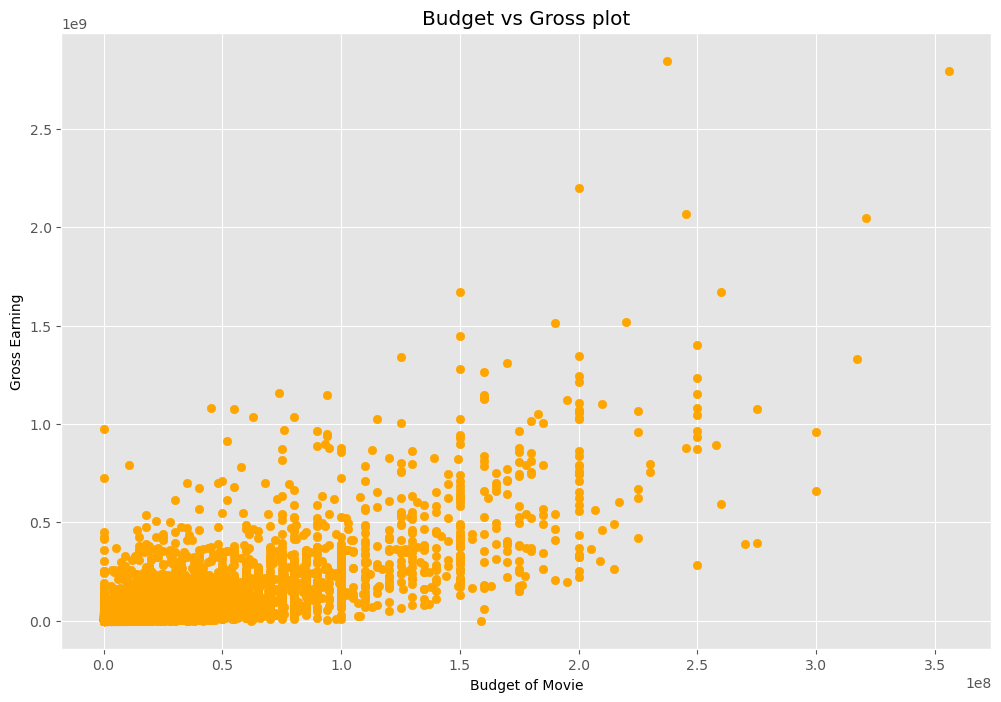

In [29]:
## Plotting bidget vs Gross curve:
plt.scatter(y=df['gross'], x=df['budget'], c='orange')
plt.title("Budget vs Gross plot")
plt.ylabel('Gross Earning')
plt.xlabel('Budget of Movie')
plt.show()

<Axes: xlabel='budget', ylabel='gross'>

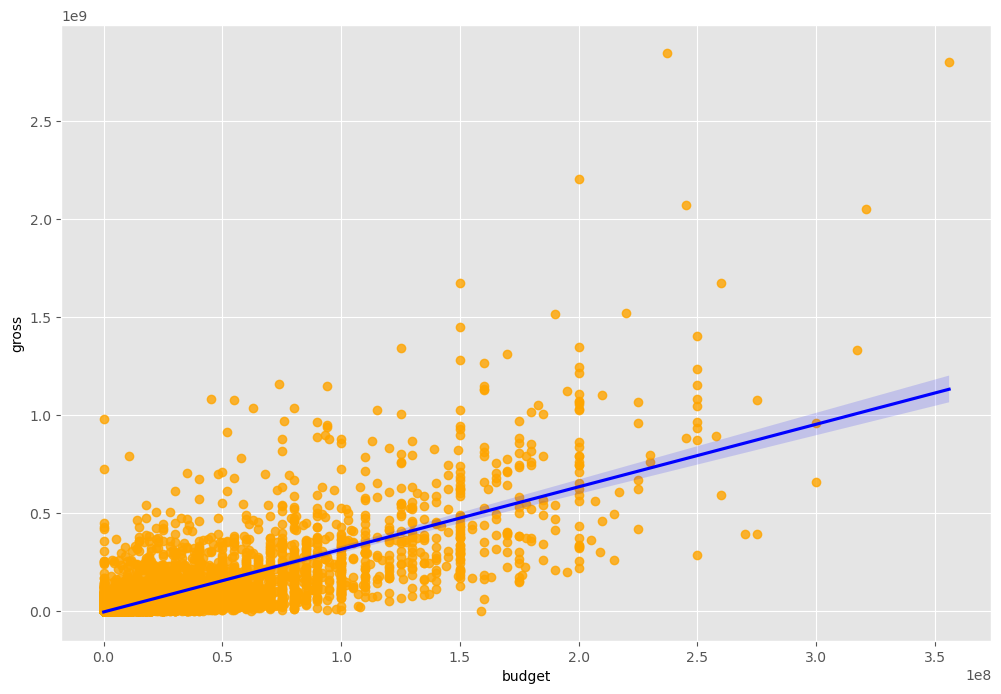

In [28]:
## Plotting linear regression curve:
sns.regplot(data=df, x='budget', y='gross', scatter_kws={'color':'orange'}, line_kws={'color':'blue'})

<font size=4>As budget is increasing Gross earning also increases.

In [33]:
## Correlation b/w numerical features:
df.corr(method='pearson', numeric_only=True)

,year,score,votes,budget,gross,runtime
year,1.000000,0.097995,0.222945,0.309212,0.261900,0.120811
score,0.097995,1.000000,0.409182,0.055665,0.186392,0.399451
votes,0.222945,0.409182,1.000000,0.486862,0.632834,0.309212
budget,0.309212,0.055665,0.486862,1.000000,0.750157,0.269510
gross,0.261900,0.186392,0.632834,0.750157,1.000000,0.245235
runtime,0.120811,0.399451,0.309212,0.269510,0.245235,1.000000


<font size=4>There is high correlation between Gross and Budget.

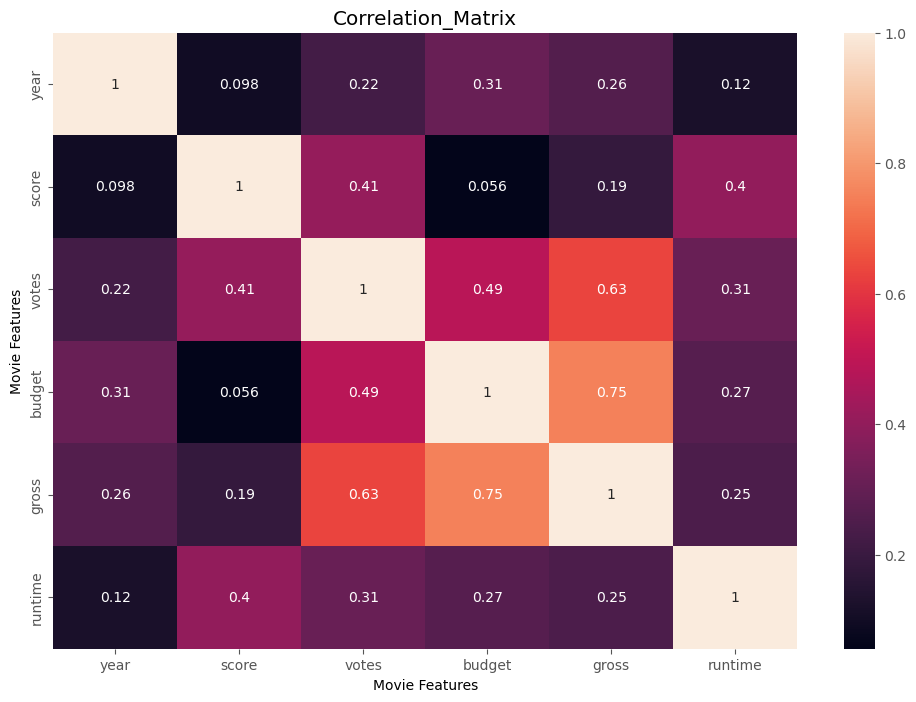

In [40]:
## plotting heatmap:
sns.heatmap(df.corr(method='pearson', numeric_only=True), annot=True)
plt.title('Correlation_Matrix')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [41]:
df_numerized = df

In [42]:
## The purpose of this code is to convert categorical columns in the DataFrame 
## into numerical representation for further analysis or modeling tasks.

for col_name in df_numerized.columns:
    if df_numerized[col_name].dtype == 'object':
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes    

In [44]:
df_numerized.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,533,5,0,2009,5445,7.8,1100000.0,1155,1778,2334,55,237000000,2847246203,2253,162.0
7445,535,5,0,2019,5777,8.4,903000.0,162,743,2241,55,356000000,2797501328,1606,181.0
3045,6896,5,6,1997,3045,7.8,1100000.0,1155,1778,1595,55,200000000,2201647264,-1,194.0
6663,5144,5,0,2015,5925,7.8,876000.0,1125,2550,524,55,245000000,2069521700,1540,138.0
7244,536,5,0,2018,5779,8.4,897000.0,162,743,2241,55,321000000,2048359754,-1,149.0


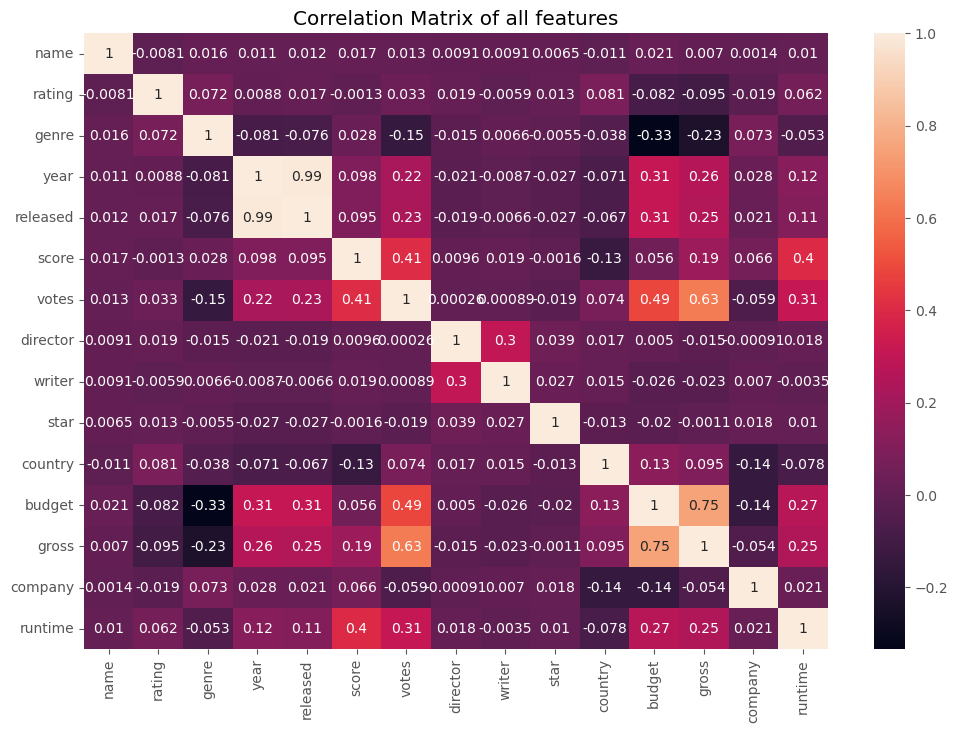

In [45]:
## Creating heatmap to analyze correlation between all feature:
sns.heatmap(df_numerized.corr(method='pearson'), annot=True)
plt.title('Correlation Matrix of all features')
plt.show()

In [46]:
corr_mat = df_numerized.corr()
corr_pair = corr_mat.unstack()

In [53]:
corr_pair.head()

name  name        1.000000
      rating     -0.008069
      genre       0.016355
      year        0.011453
      released    0.012305
dtype: float64

In [48]:
sorted_pair = corr_pair.sort_values()

In [49]:
sorted_pair.head()

budget  genre    -0.334021
genre   budget   -0.334021
gross   genre    -0.234297
genre   gross    -0.234297
        votes    -0.145307
dtype: float64

In [52]:
high_corr = sorted_pair[(sorted_pair>0.5)]
high_corr.head()

votes   gross       0.632834
gross   votes       0.632834
budget  gross       0.750157
gross   budget      0.750157
year    released    0.986044
dtype: float64

### Conclusion:
- correlation with company name is very less.
- there is high correlation between budget and gross